In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

np.random.seed(123)
import env
import acquire

In [5]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [6]:
query = "SELECT measurements.measurement_id, measurements.sepal_length,\
                measurements.sepal_width, measurements.petal_length, \
                measurements.petal_width, species.species_name, species.species_id \
            FROM measurements JOIN species ON(species.species_id=measurements.species_id)"

In [7]:
def get_data():
    return pd.read_sql(query,get_connection('iris_db'))

In [8]:
df = get_data()

In [9]:
df

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,species_id
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1
5,6,5.4,3.9,1.7,0.4,setosa,1
6,7,4.6,3.4,1.4,0.3,setosa,1
7,8,5.0,3.4,1.5,0.2,setosa,1
8,9,4.4,2.9,1.4,0.2,setosa,1
9,10,4.9,3.1,1.5,0.1,setosa,1


In [10]:
def prep_iris_inline(df):
    df = df.rename(columns={'species_name': 'species'})
    df = df.drop(columns=['measurement_id', 'species_id'])
    return df

In [12]:

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# 80/20 
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.species)
# 70/30 
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)

In [16]:
train.shape, validate.shape, test.shape


((84, 5), (36, 5), (30, 5))

In [17]:
# 2
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 138 to 54
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [18]:

train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
74,6.4,2.9,4.3,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor


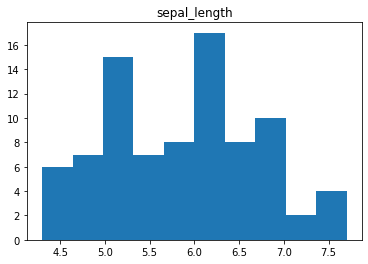

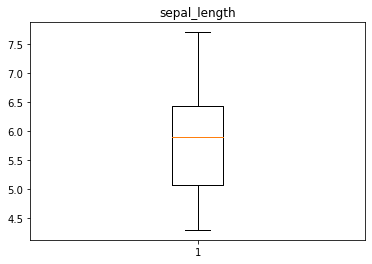

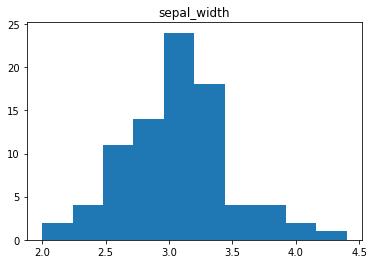

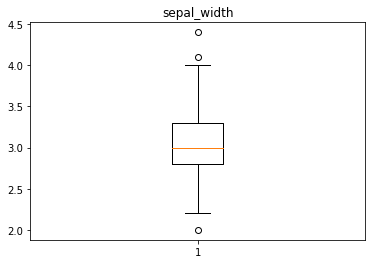

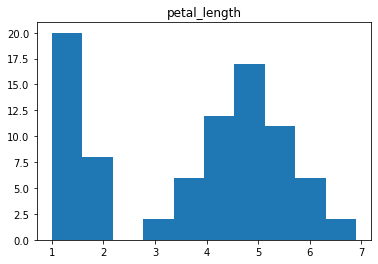

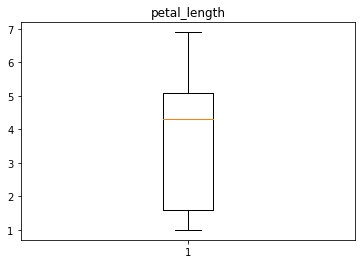

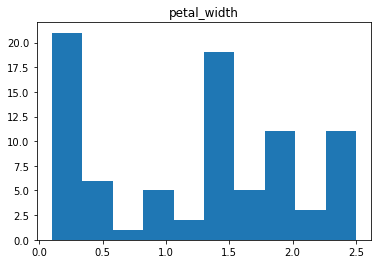

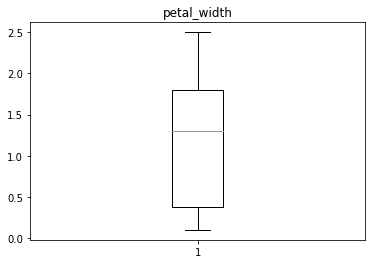

In [19]:

num_cols = train.columns[[train[col].dtype == 'float64' for col in train.columns]]
for col in num_cols:
    plt.hist(train[col])
    plt.title(col)
    plt.show()
    plt.boxplot(train[col])
    plt.title(col)
    plt.show()

In [20]:
train.species.value_counts()

virginica     28
setosa        28
versicolor    28
Name: species, dtype: int64

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

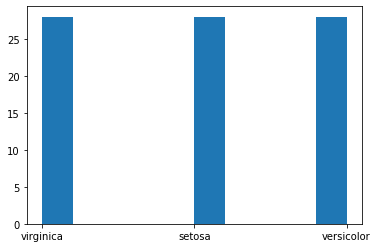

In [21]:
plt.hist(train.species)


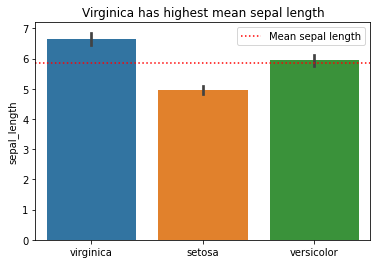

In [22]:
# 3 
plt.title("Virginica has highest mean sepal length")
sns.barplot(x="species", y="sepal_length", data=train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

In [23]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="greater")
t, p

(768.5, 2.982389808696449e-10)

In [24]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
652.0 1.0119920315840621e-05
------------


Comparing sepal_width between virginica and versicolor
534.0 0.009508012794926874
------------


Comparing petal_length between virginica and versicolor
771.5 2.5253450566492905e-10
------------


Comparing petal_width between virginica and versicolor
768.5 2.982389808696449e-10
------------




In [ ]:
# petal_length and petal_width show the most seperation between species

# viginica iris have the largest petals
# setosa iris have the smallest petals
# setosa seem to have wide & short sepals

In [25]:
#4 
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']


In [26]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]


In [27]:
train.groupby('species')['sepal_area'].sum()

species
setosa        473.12
versicolor    467.81
virginica     554.13
Name: sepal_area, dtype: float64

In [ ]:
# sepal_length is useful
# petal_area is very useful, as we would expect given the previous plot of petal_width x petal length.
# sepal_area is questionable, as we don't see much separation when we look at the 3rd plot in a hortizonal direction. Again, some value in sepal width, but not a ton.
